In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import  RandomForestClassifier
from sklearn import metrics

In [4]:
import numpy as np

In [5]:
import pandas as pd
import os
import glob

In [6]:
dir_list = ["1_1","1_2","2_1","2_2","3_1","3_2"]

In [7]:
test_dir_list = ["1_3","1_4","1_5","1_6","1_7","2_3","2_4","2_5","2_6","2_7","3_3"]

### setting 2

In [22]:
one_train = pd.read_csv("two_train_combine.csv")

In [23]:
one_test = pd.read_csv("two_test_combine.csv")

In [24]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [25]:
one_train = clean_dataset(one_train)
one_test = clean_dataset(one_test)

In [11]:
one_train["RUL_x"]

0         7440.09961
1         7440.09922
2         7440.09883
3         7440.09844
4         7440.09805
             ...    
782331       0.00156
782332       0.00117
782333       0.00078
782334       0.00039
782335       0.00000
Name: RUL_x, Length: 782331, dtype: float64

In [12]:
def two_time_group(one_train):
    time_group_list = []
    for i in range(1,int(one_train["id"].max())+1,1):
        one_id = one_train[one_train["id"]==i][["id","RUL_x"]]
        one_id = one_id.reset_index()
        one_id.loc[one_id["RUL_x"]>one_id.loc[0,"RUL_x"]/2,"time_group"] = 0
        one_id.loc[one_id["RUL_x"]<one_id.loc[0,"RUL_x"]/2,"time_group"] = 1
        time_group_list = time_group_list + list(one_id["time_group"].values)
    one_train["time_group"] = time_group_list
    return one_train

In [135]:
one_id.loc[one_id["RUL_x"]>one_id.loc[0,"RUL_x"]/2,"time_group"] = 0
one_id.loc[(one_id["RUL_x"]<one_id.loc[0,"RUL_x"]*0.5) & (one_id["RUL_x"]>one_id.loc[0,"RUL_x"]*0.25),"time_group"] = 1
one_id.loc[(one_id["RUL_x"]<one_id.loc[0,"RUL_x"]*0.25) & (one_id["RUL_x"]>one_id.loc[0,"RUL_x"]*0.125),"time_group"] = 2 
one_id.loc[one_id["RUL_x"]<one_id.loc[0,"RUL_x"]*0.125,"time_group"] = 3

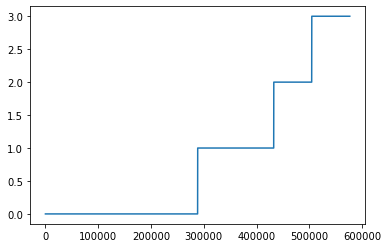

In [136]:
plt.plot(one_id["time_group"])

In [104]:
one_id.loc[0,"RUL_x"]*0.75

16890.07470675

In [48]:
def three_time_group(one_train):
    time_group_list = []
    for i in range(1,int(one_train["id"].max())+1,1):
        one_id = one_train[one_train["id"]==i][["id","RUL_x"]]
        one_id = one_id.reset_index()
        one_id.loc[one_id["RUL_x"]>one_id.loc[0,"RUL_x"]/2,"time_group"] = 0
        one_id.loc[(one_id["RUL_x"]<one_id.loc[0,"RUL_x"]/2) & (one_id["RUL_x"]>one_id.loc[0,"RUL_x"]*0.25),"time_group"] = 1
        one_id.loc[one_id["RUL_x"]<one_id.loc[0,"RUL_x"]*0.25,"time_group"] = 2
        time_group_list = time_group_list + list(one_id["time_group"].values)
    one_train["time_group"] = time_group_list
    return one_train

In [49]:
def four_time_group(one_train):
    time_group_list = []
    for i in range(1,int(one_train["id"].max())+1,1):
        one_id = one_train[one_train["id"]==i][["id","RUL_x"]]
        one_id = one_id.reset_index()
        one_id.loc[one_id["RUL_x"]>one_id.loc[0,"RUL_x"]/2,"time_group"] = 0
        one_id.loc[(one_id["RUL_x"]<one_id.loc[0,"RUL_x"]*0.5) & (one_id["RUL_x"]>one_id.loc[0,"RUL_x"]*0.25),"time_group"] = 1
        one_id.loc[(one_id["RUL_x"]<one_id.loc[0,"RUL_x"]*0.25) & (one_id["RUL_x"]>one_id.loc[0,"RUL_x"]*0.125),"time_group"] = 2 
        one_id.loc[one_id["RUL_x"]<one_id.loc[0,"RUL_x"]*0.125,"time_group"] = 3
        time_group_list = time_group_list + list(one_id["time_group"].values)
    one_train["time_group"] = time_group_list
    return one_train

In [26]:
one_train = two_time_group(one_train)

In [27]:
one_test = two_time_group(one_test)

In [32]:
one_train = clean_dataset(one_train)
one_test = clean_dataset(one_test)

In [28]:
one_train = one_train.reset_index()
one_test = one_test.reset_index()

In [33]:
X_train = one_train.drop(["index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id","id_x","id.1","id.2","time_group"], axis=1)
X_test = one_test.drop(["index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id","id_x","id.1","id.2","time_group"], axis=1)
y_train = one_train["time_group"]
y_test = one_test["time_group"]

In [34]:
one_train

,index,Unnamed: 0_x,Horiz_acc,id_x,av_horiz,sd_horiz,peak_horiz,rms_horiz,skew_horiz,kurt_horiz,...,rms_temp,skew_temp,kurt_temp,crest_temp,clear_temp,shape_temp,imp_temp,RUL_y,id,time_group
0,0.0,15369.0,0.238,1.0,0.026962,0.260338,0.509,0.256702,0.211157,-0.798134,...,59.488550,0.098539,-1.351611,1.007421,1.007439,1.000012,1.007433,7440.1,1.0,0.0
1,1.0,15379.0,-0.303,1.0,0.014577,0.268270,0.509,0.263464,0.262493,-0.918790,...,59.488550,0.098539,-1.351611,1.007421,1.007439,1.000012,1.007433,7440.1,1.0,0.0
2,2.0,15389.0,0.531,1.0,0.028538,0.285469,0.531,0.281376,0.308589,-1.007622,...,59.488550,0.098539,-1.351611,1.007421,1.007439,1.000012,1.007433,7440.1,1.0,0.0
3,3.0,15399.0,-0.298,1.0,0.013115,0.292042,0.531,0.286670,0.398728,-1.052732,...,59.488550,0.098539,-1.351611,1.007421,1.007439,1.000012,1.007433,7440.1,1.0,0.0
4,4.0,15409.0,-0.095,1.0,0.009231,0.292811,0.531,0.287273,0.436532,-1.051198,...,59.488550,0.098539,-1.351611,1.007421,1.007439,1.000012,1.007433,7440.1,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782326,782331.0,5916119.0,-0.128,1.0,-0.004577,0.232897,0.346,0.228421,-0.008840,-1.529796,...,112.351017,-0.262185,-0.579971,1.000205,1.000205,1.000000,1.000205,0.0,2.0,1.0
782327,782332.0,5916129.0,0.066,1.0,0.002385,0.232169,0.346,0.227673,-0.100525,-1.507062,...,112.351017,-0.262185,-0.579971,1.000205,1.000205,1.000000,1.000205,0.0,2.0,1.0
782328,782333.0,5916139.0,0.028,1.0,0.015038,0.223786,0.346,0.219955,-0.188188,-1.390106,...,112.351017,-0.262185,-0.579971,1.000205,1.000205,1.000000,1.000205,0.0,2.0,1.0
782329,782334.0,5916149.0,-0.189,1.0,0.018308,0.219984,0.346,0.216487,-0.182705,-1.360011,...,112.351017,-0.262185,-0.579971,1.000205,1.000205,1.000000,1.000205,0.0,2.0,1.0


In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
def plot_features_weights(model, weights, feature_names):
    

    (px, py) = (8, 10) if len(weights) > 30 else (8, 5)
    W = pd.DataFrame({'Weights':weights}, feature_names)
    W_df = W.sort_values(by='Weights', ascending=True)
    W_df.tail(10).plot(kind='barh', color='r', figsize=(px,py))
    plt.xlabel(model)
    plt.gca().legend_ = None

In [20]:
def plot_residual(model, y_train, y_train_pred, y_test, y_test_pred):
    plt.figure(figsize=(20,10))
    plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
    plt.scatter(y_test_pred, y_test_pred - y_test, c='lightgreen', marker='s', label='Test data')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-50, xmax=y_train.max()+50, color='red', lw=2)
    plt.title(model + ' Residuals')
    plt.show()

In [35]:
rf = RandomForestClassifier(random_state=0,max_depth=6,n_estimators=50,min_samples_split=100,n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [41]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [40]:
y_test_predict = rf.predict(X_test)
y_train_predict = rf.predict(X_train)

train_score = accuracy_score(y_train, y_train_predict)
test_score = accuracy_score(y_test, y_test_predict)
train_f1 = f1_score(y_train, y_train_predict)
test_f1 = f1_score(y_test, y_test_predict)
print('accuracy training: %.3f, accuracy testing: %.3f' % (
      (train_score), (test_score)))
print('F1 training: %.3f, F1 testing: %.3f' % (
      (train_f1), (test_f1)))

accuracy training: 0.787, accuracy testing: 0.502
F1 training: 0.815, F1 testing: 0.009


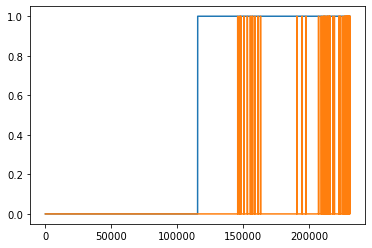

In [44]:
plt.plot(y_test)
plt.plot(y_test_predict)

In [42]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67    115328
         1.0       1.00      0.00      0.01    115328

    accuracy                           0.50    230656
   macro avg       0.75      0.50      0.34    230656
weighted avg       0.75      0.50      0.34    230656



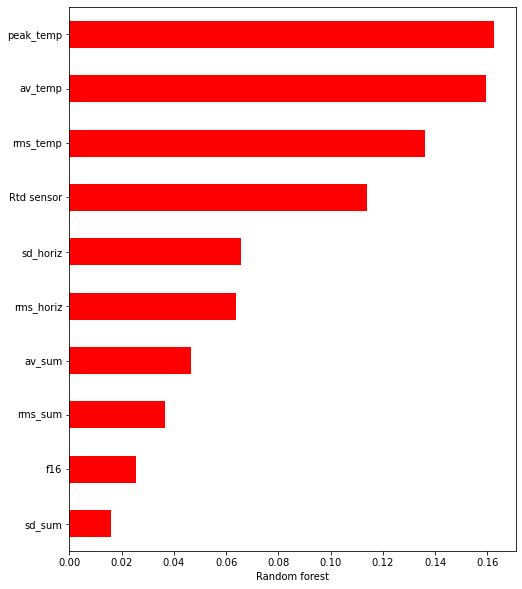

In [45]:
plot_features_weights('Random forest',rf.feature_importances_, X_train.columns)

In [46]:
one_train

,index,Unnamed: 0_x,Horiz_acc,id_x,av_horiz,sd_horiz,peak_horiz,rms_horiz,skew_horiz,kurt_horiz,...,rms_temp,skew_temp,kurt_temp,crest_temp,clear_temp,shape_temp,imp_temp,RUL_y,id,time_group
0,0.0,15369.0,0.238,1.0,0.026962,0.260338,0.509,0.256702,0.211157,-0.798134,...,59.488550,0.098539,-1.351611,1.007421,1.007439,1.000012,1.007433,7440.1,1.0,0.0
1,1.0,15379.0,-0.303,1.0,0.014577,0.268270,0.509,0.263464,0.262493,-0.918790,...,59.488550,0.098539,-1.351611,1.007421,1.007439,1.000012,1.007433,7440.1,1.0,0.0
2,2.0,15389.0,0.531,1.0,0.028538,0.285469,0.531,0.281376,0.308589,-1.007622,...,59.488550,0.098539,-1.351611,1.007421,1.007439,1.000012,1.007433,7440.1,1.0,0.0
3,3.0,15399.0,-0.298,1.0,0.013115,0.292042,0.531,0.286670,0.398728,-1.052732,...,59.488550,0.098539,-1.351611,1.007421,1.007439,1.000012,1.007433,7440.1,1.0,0.0
4,4.0,15409.0,-0.095,1.0,0.009231,0.292811,0.531,0.287273,0.436532,-1.051198,...,59.488550,0.098539,-1.351611,1.007421,1.007439,1.000012,1.007433,7440.1,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782326,782331.0,5916119.0,-0.128,1.0,-0.004577,0.232897,0.346,0.228421,-0.008840,-1.529796,...,112.351017,-0.262185,-0.579971,1.000205,1.000205,1.000000,1.000205,0.0,2.0,1.0
782327,782332.0,5916129.0,0.066,1.0,0.002385,0.232169,0.346,0.227673,-0.100525,-1.507062,...,112.351017,-0.262185,-0.579971,1.000205,1.000205,1.000000,1.000205,0.0,2.0,1.0
782328,782333.0,5916139.0,0.028,1.0,0.015038,0.223786,0.346,0.219955,-0.188188,-1.390106,...,112.351017,-0.262185,-0.579971,1.000205,1.000205,1.000000,1.000205,0.0,2.0,1.0
782329,782334.0,5916149.0,-0.189,1.0,0.018308,0.219984,0.346,0.216487,-0.182705,-1.360011,...,112.351017,-0.262185,-0.579971,1.000205,1.000205,1.000000,1.000205,0.0,2.0,1.0


In [50]:
one_train = three_time_group(one_train)
one_test = three_time_group(one_test)
# one_train = one_train.reset_index()
# one_test = one_test.reset_index()
X_train = one_train.drop(["index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id","id_x","id.1","id.2","time_group"], axis=1)
X_test = one_test.drop(["index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id","id_x","id.1","id.2","time_group"], axis=1)
y_train = one_train["time_group"]
y_test = one_test["time_group"]

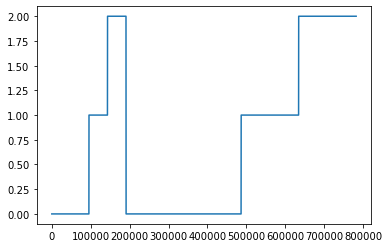

In [54]:
plt.plot(y_train)

In [55]:
rf = RandomForestClassifier(random_state=0,max_depth=6,n_estimators=50,min_samples_split=100,n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [56]:
y_test_predict = rf.predict(X_test)
y_train_predict = rf.predict(X_train)

train_score = accuracy_score(y_train, y_train_predict)
test_score = accuracy_score(y_test, y_test_predict)
train_f1 = f1_score(y_train, y_train_predict,average="weighted")
test_f1 = f1_score(y_test, y_test_predict,average="weighted")
print('accuracy training: %.3f, accuracy testing: %.3f' % (
      (train_score), (test_score)))
print('F1 training: %.3f, F1 testing: %.3f' % (
      (train_f1), (test_f1)))

accuracy training: 0.687, accuracy testing: 0.502
F1 training: 0.655, F1 testing: 0.337


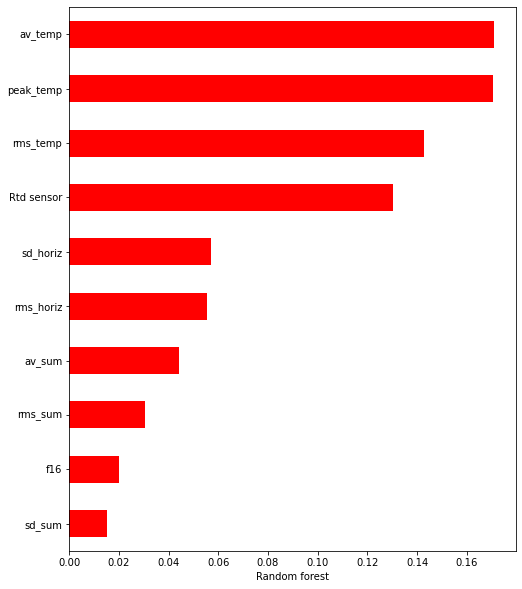

In [57]:
plot_features_weights('Random forest',rf.feature_importances_, X_train.columns)

In [58]:
one_train = four_time_group(one_train)
one_test = four_time_group(one_test)
#one_train = one_train.reset_index()
#one_test = one_test.reset_index()
X_train = one_train.drop(["index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id","id_x","id.1","id.2","time_group"], axis=1)
X_test = one_test.drop(["index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id","id_x","id.1","id.2","time_group"], axis=1)
y_train = one_train["time_group"]
y_test = one_test["time_group"]

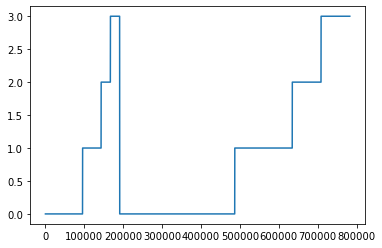

In [59]:
plt.plot(y_train)

In [61]:
rf = RandomForestClassifier(random_state=0,max_depth=6,n_estimators=50,min_samples_split=100,n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [71]:
y_train.value_counts()

0.0    391163
1.0    195519
3.0     97824
2.0     97824
Name: time_group, dtype: int64

In [75]:
y_test.value_counts()

0.0    115328
1.0     57664
3.0     28928
2.0     28736
Name: time_group, dtype: int64

In [74]:
pd.DataFrame(y_train_predict)[0].value_counts()

0.0    541725
1.0    163224
3.0     73421
2.0      3960
Name: 0, dtype: int64

In [76]:
pd.DataFrame(y_test_predict)[0].value_counts()

0.0    230319
3.0       334
1.0         3
Name: 0, dtype: int64

In [62]:
y_test_predict = rf.predict(X_test)
y_train_predict = rf.predict(X_train)

train_score = accuracy_score(y_train, y_train_predict)
test_score = accuracy_score(y_test, y_test_predict)
train_f1 = f1_score(y_train, y_train_predict,average="weighted")
test_f1 = f1_score(y_test, y_test_predict,average="weighted")
print('accuracy training: %.3f, accuracy testing: %.3f' % (
      (train_score), (test_score)))
print('F1 training: %.3f, F1 testing: %.3f' % (
      (train_f1), (test_f1)))

accuracy training: 0.617, accuracy testing: 0.501
F1 training: 0.562, F1 testing: 0.336


In [69]:
y_train

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
782326    3.0
782327    3.0
782328    3.0
782329    3.0
782330    3.0
Name: time_group, Length: 782330, dtype: float64

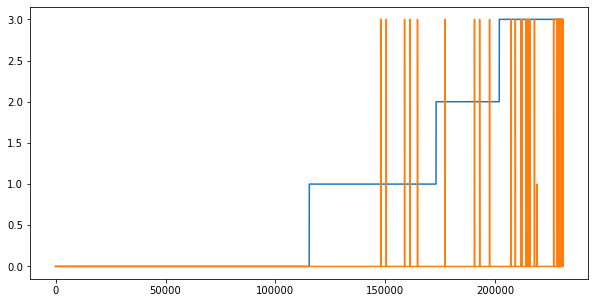

In [70]:
plt.figure(figsize=(10,5))
plt.plot(y_test)
plt.plot(y_test_predict)

In [ ]:
ans_df = pd.DataFrame(y_train)

In [ ]:
ans_df["rf_predict"] = y_train_predict

In [ ]:

train_mape = mean_absolute_error(y_train, y_train_predict)
test_mape = mean_absolute_error(y_test, y_test_predict)
print('MAE training: %.3f, MAE testing: %.3f' % (
      (train_mape), (test_mape)))

In [ ]:
y_train = ans_df[ans_df["RUL"]<500]["RUL"]
y_train_predict = ans_df[ans_df["RUL"]<500]["rf_predict"]
train_mape = mean_absolute_error(y_train, y_train_predict)
test_mape = mean_absolute_error(y_test, y_test_predict)
print('MAE training: %.3f, MAE testing: %.3f' % (
      (train_mape), (test_mape)))

In [ ]:
y_train = ans_df[ans_df["RUL"]<10000]["RUL"]
y_train_predict = ans_df[ans_df["RUL"]<10000]["rf_predict"]
train_mape = mean_absolute_error(y_train, y_train_predict)
test_mape = mean_absolute_error(y_test, y_test_predict)
print('MAE training: %.3f, MAE testing: %.3f' % (
      (train_mape), (test_mape)))

In [ ]:
y_train = ans_df[ans_df["RUL"]>10000]["RUL"]
y_train_predict = ans_df[ans_df["RUL"]>10000]["rf_predict"]
train_mape = mean_absolute_error(y_train, y_train_predict)
test_mape = mean_absolute_error(y_test, y_test_predict)
print('MAE training: %.3f, MAE testing: %.3f' % (
      (train_mape), (test_mape)))

In [ ]:
ans_df[ans_df["RUL"]>10000]

In [ ]:
plt.scatter(ans_df.index,ans_df["RUL"])

In [ ]:
plot_features_weights('Random Forest Regressor', rf.feature_importances_, X_train.columns)

In [ ]:
plot_residual('Random Forest Regressor',y_train, y_train_predict, y_test, y_test_predict)

In [ ]:
y_train

In [ ]:
y_train_predict 

In [ ]:
mean_absolute_percentage_error

In [ ]:
X_train.isnull().values.any()

In [ ]:
# 計算相關係數
corr = one_train.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
plt.figure(figsize=(10,40))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(pd.DataFrame(corr["RUL"].sort_values(ascending=False)), cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
plt.scatter(one_train["RUL"],one_train["p2ph_vert"])

In [ ]:
plt.scatter(one_train["RUL"],one_train["av_sum"])